In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd
from cobra.flux_analysis import flux_variability_analysis

In [2]:
model = read_sbml_model('data/iYO844_5htp.xml')

**Observing how the growth rate changes with increasing 5-HTP export flux**

In [3]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [4]:
ppp_5HTP = production_envelope(model,
                    reactions=[model.reactions.DM_hydroxy_trp],
                    objective=model.reactions.BIOMASS_BS_10)

In [5]:
ppp_5HTP

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,DM_hydroxy_trp
0,EX_glc__D_e,0.0,0.0,NaN,0.117966,1.255696e+01,NaN,0.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.111820,1.190272e+01,NaN,0.030401
2,EX_glc__D_e,0.0,0.0,NaN,0.105674,1.124848e+01,NaN,0.060802
3,EX_glc__D_e,0.0,0.0,NaN,0.099528,1.059423e+01,NaN,0.091202
4,EX_glc__D_e,0.0,0.0,NaN,0.093381,9.939991e+00,NaN,0.121603
5,EX_glc__D_e,0.0,0.0,NaN,0.087235,9.285750e+00,NaN,0.152004
6,EX_glc__D_e,0.0,0.0,NaN,0.081089,8.631508e+00,NaN,0.182405
7,EX_glc__D_e,0.0,0.0,NaN,0.074942,7.977266e+00,NaN,0.212805
8,EX_glc__D_e,0.0,0.0,NaN,0.068796,7.323024e+00,NaN,0.243206
9,EX_glc__D_e,0.0,0.0,NaN,0.062650,6.668782e+00,NaN,0.273607


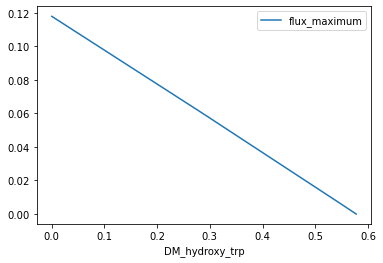

In [6]:
ppp_5HTP.plot(x='DM_hydroxy_trp', y='flux_maximum')

Not so good at all - we cannot get high flux towards 5-HTP without sacrificing the growth rate

In [7]:
hydroxy_trp_flux_analysis = flux_variability_analysis(model, model.reactions.DM_hydroxy_trp, fraction_of_optimum = 0.5)
print(hydroxy_trp_flux_analysis)

                minimum   maximum
DM_hydroxy_trp      0.0  0.291588


If we keep the growth rate at 50% of the maximum, we still can get around 52% of the max 5-HTP flux.

**Knocking out a single gene and setting the objective value of the model for 5-HTP export flux**

Only non-zero biomass production flux knock-outs are selected

In [8]:
for gene in model.genes:
    with model:
        gene.knock_out()
        model.objective = model.reactions.DM_hydroxy_trp
        solution = model.optimize()
        if solution.fluxes.BIOMASS_BS_10 > 0:
            print ('5-HTP export flux:', solution.fluxes.DM_hydroxy_trp, 'Gene ID:', gene.id, 'Biomass production:', solution.fluxes.BIOMASS_BS_10)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


No solutions are displayed, as in case of every knock-out and subsequent optimisation for max 5-HTP export no growth is observed.

**Knocking out a single gene, running optimisation for max biomass production flux and observing 5-HTP export flux**

Only non-zero 5-HTP export flux knock-outs are selected

In [9]:
knock_out_list = pd.DataFrame(columns=['Gene ID', '5-HTP export flux', 'Biomass production flux'])
for gene in model.genes:
    with model:
        gene.knock_out()
        solution = model.optimize()
        if solution.fluxes.DM_hydroxy_trp > 0:
            knock_out_list = knock_out_list.append({ 'Gene ID': gene.id, '5-HTP export flux': solution.fluxes.DM_hydroxy_trp, 'Biomass production flux': model.optimize().objective_value}, ignore_index=True)

In each and every case, either the growth rate or the 5-HTP export flux are very close to zero, so it can be concluded that no knock-outs would improve the 5-HTP flux

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(knock_out_list)

     Gene ID  5-HTP export flux  Biomass production flux
0   BSU24340  0.245455           3.263902e-17           
1   BSU29200  0.245455           3.263902e-17           
2   BSU22440  0.245455           3.263902e-17           
3   BSU24350  0.245455           3.263902e-17           
4   BSU29210  0.245455           3.263902e-17           
5   BSU11210  0.245455          -2.209565e-18           
6   BSU11200  0.245455          -2.209565e-18           
7   BSU16920  0.245455           2.625570e-15           
8   BSU02270  0.245455           9.472102e-18           
9   BSU00460  0.257151          -7.422270e-17           
10  BSU00500  0.257151          -4.035835e-15           
11  BSU35740  0.257151          -1.947266e-17           
12  BSU00760  0.276852           6.635196e-17           
13  BSU00740  0.235840          -1.887982e-17           
14  BSU37150  0.257151          -6.049465e-17           
15  BSU36900  0.294074           7.739983e-15           
16  BSU09540  0.257151         

<ipython-input-10-f4d78eb1eacc>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [45]:
#create list to store the reactions' IDs
carbon_uptake = list()

#go through all metabolites in the model that have carbon in their chem.structure
for metabolite in model.metabolites:
    if 'C' in metabolite.elements:
        #find metabolites that are external
        if metabolite.id[-1] == 'e':
            reactions = metabolite.reactions
            #pick reactions which exchange the metabolite with the external environment
            for element in reactions:
                if str(element.id[:2]) == 'EX':
                    carbon_uptake.append(element.id)

In [46]:
carbon_uptake

['EX_2ddglcn_e',
 'EX_2hxmp_e',
 'EX_2pg_e',
 'EX_2pglyc_e',
 'EX_3amba_e',
 'EX_5mtr_e',
 'EX_3amp_e',
 'EX_6pgc_e',
 'EX_3cmp_e',
 'EX_3gmp_e',
 'EX_ala_L_leu__L_e',
 'EX_L_alagly_e',
 'EX_Larab_e',
 'EX_Lcyst_e',
 'EX_abt__L_e',
 'EX_alaala_e',
 'EX_alltn_e',
 'EX_ac_e',
 'EX_3pg_e',
 'EX_acac_e',
 'EX_3ump_e',
 'EX_amp_e',
 'EX_4abut_e',
 'EX_acgam_e',
 'EX_amylase_e',
 'EX_acmana_e',
 'EX_acnam_e',
 'EX_arab__D_e',
 'EX_arab__L_e',
 'EX_arbt_e',
 'EX_actn__R_e',
 'EX_arg__L_e',
 'EX_cmp_e',
 'EX_ade_e',
 'EX_adn_e',
 'EX_argp_e',
 'EX_co2_e',
 'EX_asn__L_e',
 'EX_asp__L_e',
 'EX_akg_e',
 'EX_ala_B_e',
 'EX_crn_e',
 'EX_ala__D_e',
 'EX_bilea_e',
 'EX_ala_L_Thr__L_e',
 'EX_csn_e',
 'EX_btd_RR_e',
 'EX_ala_L_asp__L_e',
 'EX_ctbt_e',
 'EX_ala__L_e',
 'EX_ala_L_gln__L_e',
 'EX_cys__D_e',
 'EX_ala_L_glu__L_e',
 'EX_buts_e',
 'EX_ala_L_his__L_e',
 'EX_cys__L_e',
 'EX_etha_e',
 'EX_cyst__L_e',
 'EX_eths_e',
 'EX_etoh_e',
 'EX_cytd_e',
 'EX_f6p_e',
 'EX_dad_2_e',
 'EX_cellb_e',
 'EX_cgly_e

In [1]:
medium = model.medium

#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    medium = model.medium
    with model:
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        model.objective = model.reactions.DM_hydroxy_trp
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        if solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M > 0:
            print(solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
            print(max_5HTP_production)

NameError: name 'model' is not defined

In [47]:
model.medium

{'EX_fe3_e': 999999.0,
 'EX_glc__D_e': 1.7,
 'EX_ca2_e': 999999.0,
 'EX_so4_e': 5.0,
 'EX_co2_e': 999999.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_mg2_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_nh4_e': 5.0,
 'EX_o2_e': 999999.0,
 'EX_pi_e': 5.0}

In [48]:
with model:
    model.objective = model.reactions.DM_hydroxy_trp
    solution = model.optimize()
    print("the flux of 5htp production: ",solution.fluxes["DM_hydroxy_trp"] , "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = solution.fluxes['DM_hydroxy_trp'] / (-1. * solution.fluxes['EX_glc__D_e'])
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glc]")
    # calculating mass yield
    M_5htp = 0.22023 # g/mmol
    M_glc = 0.180156 # g/mmol
    mass_yield_5htp = solution.fluxes['DM_hydroxy_trp']*M_5htp / (-1. * solution.fluxes['EX_glc__D_e'])*M_glc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glc]")
    

the flux of 5htp production:  0.5776145203111502 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.3397732472418531 [mmol-5htp / mmol-glc]
The mass yield of 5htp  0.013480760412122646 [g-5htp / g-glc]
The c-cmol yield of 5thp  0.020217529099025293 [cmol-5htp / cmol-glc]


In [49]:
medium = model.medium

with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 1.7
    model.medium = medium
    model.objective = model.reactions.DM_hydroxy_trp
    solution = model.optimize()
    print("the flux of 5htp production: ",solution.fluxes["DM_hydroxy_trp"] , "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = solution.fluxes['DM_hydroxy_trp'] / (-1. * solution.fluxes['EX_glyc_e'])
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glyc]")
    # calculating mass yield
    M_5htp = 0.22023 # g/mmol
    M_glyc = 0.09209 # g/mmol
    mass_yield_5htp = solution.fluxes['DM_hydroxy_trp']*M_5htp / (-1. * solution.fluxes['EX_glyc_e'])*M_glyc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glyc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_glyc = M_glyc/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_glyc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glyc]")

the flux of 5htp production:  0.25900900900900986 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.15235824059353523 [mmol-5htp / mmol-glyc]
The mass yield of 5htp  0.0030899745369634443 [g-5htp / g-glyc]
The c-cmol yield of 5thp  0.0047376429281487525 [cmol-5htp / cmol-glyc]


**Calculating yield at 50% growth**

In [50]:
with model:
    # calculating flux at 50% growth
    hydroxy_trp_50 = float(flux_variability_analysis(model, model.reactions.DM_hydroxy_trp, fraction_of_optimum = 0.5)["maximum"][0])
    glucose_50 = float(flux_variability_analysis(model, model.reactions.EX_glc__D_e, fraction_of_optimum = 0.5)["maximum"][0])
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * glucose_50)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glc]")
    # calculating mass yield
    M_5htp = 0.22023 # g/mmol
    M_glc = 0.180156 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * glucose_50)*M_glc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glc]")
    

the flux of 5htp production:  0.2915881347555335 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.2810488045836465 [mmol-5htp / mmol-glc]
The mass yield of 5htp  0.011150823761026584 [g-5htp / g-glc]
The c-cmol yield of 5thp  0.016723248316462002 [cmol-5htp / cmol-glc]


In [51]:
with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 1.7
    model.medium = medium
    hydroxy_trp_50 = float(flux_variability_analysis(model, model.reactions.DM_hydroxy_trp, fraction_of_optimum = 0.5)["maximum"][0])
    glycerol_50 = float(flux_variability_analysis(model, model.reactions.EX_glyc_e, fraction_of_optimum = 0.5)["maximum"][0])
    print("the flux of 5htp production: ",hydroxy_trp_50 , "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * glycerol_50)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glyc]")
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glyc = 92.09/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * glycerol_50)*M_glyc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glyc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_glyc = M_glyc/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_glyc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glyc]")

the flux of 5htp production:  0.12950450450451284 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.11000382622005205 [mmol-5htp / mmol-glyc]
The mass yield of 5htp  0.002230985476495029 [g-5htp / g-glyc]
The c-cmol yield of 5thp  0.003420614778238962 [cmol-5htp / cmol-glyc]
